### Import and configure modules

In [ ]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [ ]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [ ]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

Download images and choose a style image and a content image:

In [ ]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://www.clarku.edu/departments/computer-science/wp-content/blogs.dir/5/files/sites/137/2019/08/2017-John-Magee-clark-university-6.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://www.vangoghgallery.com/img/starry_night_full.jpg')

442368/434357 [==============================] - 0s 1us/step


## Visualize the input

Define a function to load an image and limit its maximum dimension to 512 pixels.

In [ ]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

Create a simple function to display an image:

In [ ]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

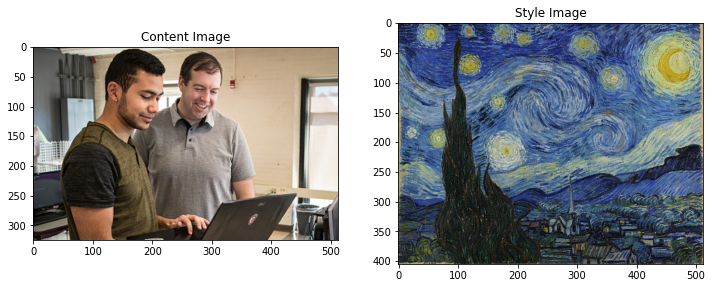

In [ ]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

## Fast Style Transfer using TF-Hub

This tutorial demonstrates the original style-transfer algorithm, which optimizes the image content to a particular style. Before getting into the details, let's see how the [TensorFlow Hub model](https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2) does this:

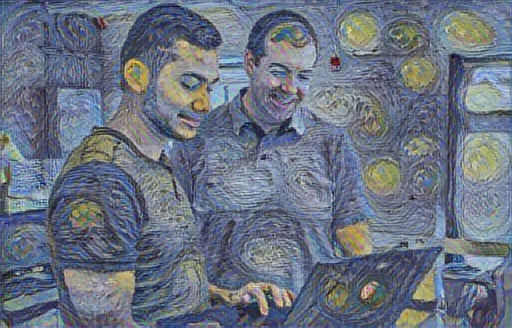

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

#Using same images

In [ ]:
content_path1 = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://www.clarku.edu/departments/computer-science/wp-content/blogs.dir/5/files/sites/137/2019/08/2017-John-Magee-clark-university-6.jpg')
style_path1 = tf.keras.utils.get_file('kandinsky5.jpg','https://www.clarku.edu/departments/computer-science/wp-content/blogs.dir/5/files/sites/137/2019/08/2017-John-Magee-clark-university-6.jpg')

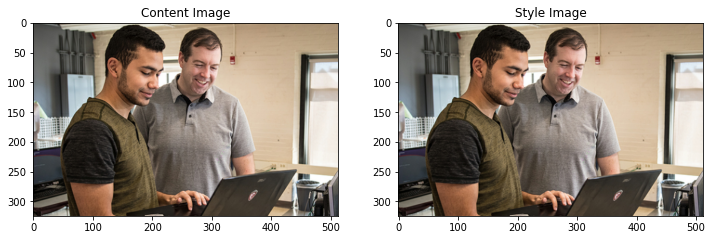

In [ ]:
content_image1 = load_img(content_path1)
style_image1 = load_img(content_path1)

plt.subplot(1, 2, 1)
imshow(content_image1, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image1, 'Style Image')

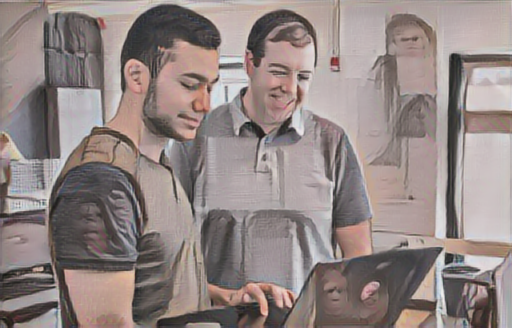

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image1 = hub_model(tf.constant(content_image1), tf.constant(style_image1))[0]
tensor_to_image(stylized_image1)

In [ ]:
# content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://www.vangoghgallery.com/img/starry_night_full.jpg')
style_path2 = tf.keras.utils.get_file('kandinsky5.jpg','https://www.vangoghgallery.com/img/starry_night_full.jpg')

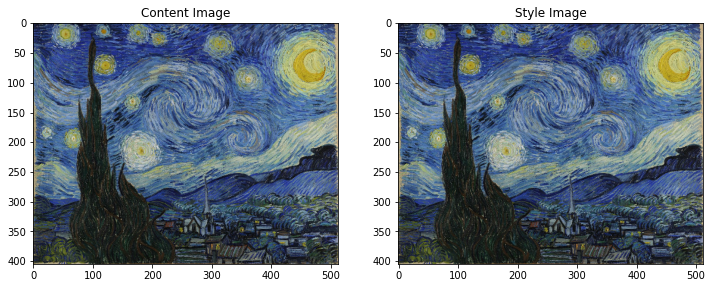

In [ ]:
content_image2 = load_img(style_path2)
style_image2 = load_img(style_path2)

plt.subplot(1, 2, 1)
imshow(content_image2, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image2, 'Style Image')

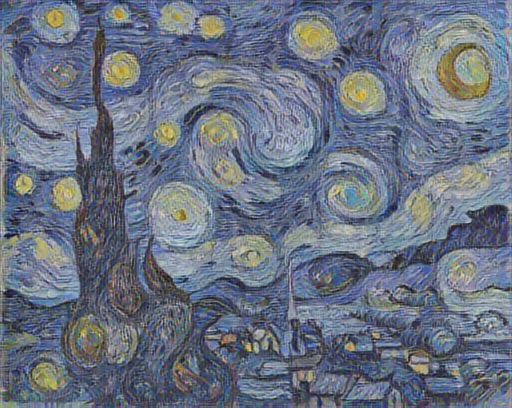

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image2), tf.constant(style_image2))[0]
tensor_to_image(stylized_image)

#Reversing the images 

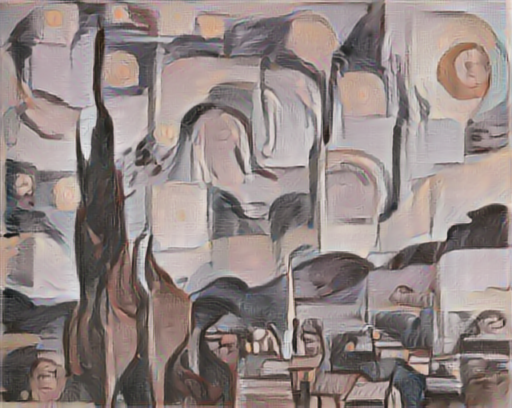

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image3 = hub_model(tf.constant(style_image), tf.constant(content_image))[0]
tensor_to_image(stylized_image3)

#using a very realistic content image with Van Gogh painting as style image

In [ ]:
content_path3 = tf.keras.utils.get_file('YellowLabradorLooking_new1.jpg', 'https://i1.wp.com/digital-photography-school.com/wp-content/uploads/2019/10/Karthika-Gupta-Compelling-Nature-Photos-6.jpg?fit=1500%2C1000&ssl=1')
style_path3 = tf.keras.utils.get_file('kandinsky5.jpg','https://www.vangoghgallery.com/img/starry_night_full.jpg')

516096/514073 [==============================] - 0s 0us/step


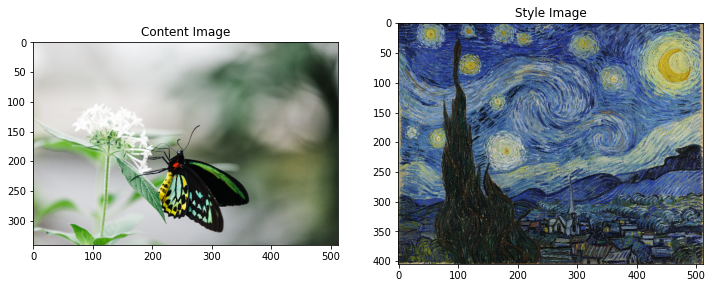

In [ ]:
content_image3 = load_img(content_path3)
style_image3 = load_img(style_path3)

plt.subplot(1, 2, 1)
imshow(content_image3, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image3, 'Style Image')

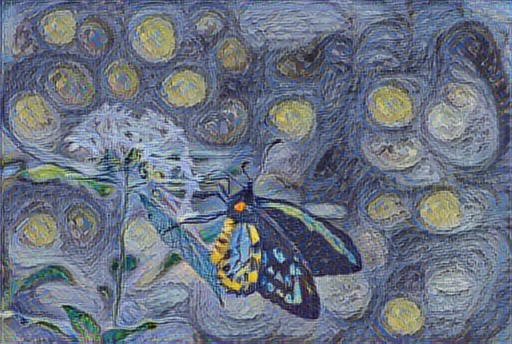

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image4 = hub_model(tf.constant(content_image3), tf.constant(style_image3))[0]
tensor_to_image(stylized_image4)

##switching the van gogh painting to content image and realistic image to style image

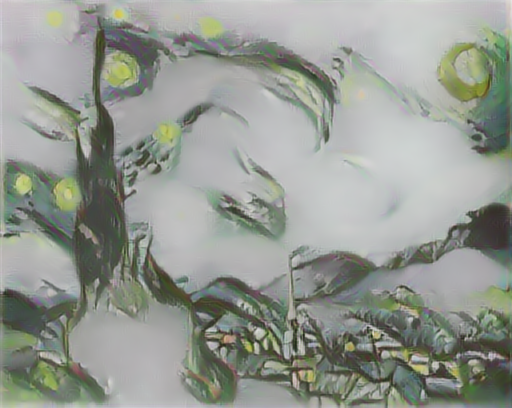

In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image5 = hub_model(tf.constant(style_image3), tf.constant(content_image3))[0]
tensor_to_image(stylized_image5)

## Define content and style representations

Use the intermediate layers of the model to get the *content* and *style* representations of the image. Starting from the network's input layer, the first few layer activations represent low-level features like edges and textures. As you step through the network, the final few layers represent higher-level features—object parts like *wheels* or *eyes*. In this case, you are using the VGG19 network architecture, a pretrained image classification network. These intermediate layers are necessary to define the representation of content and style from the images. For an input image, try to match the corresponding style and content target representations at these intermediate layers.


Load a [VGG19](https://keras.io/api/applications/vgg/#vgg19-function) and test run it on our image to ensure it's used correctly:

In [ ]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

574717952/574710816 [==============================] - 3s 0us/step


TensorShape([1, 1000])

In [ ]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

40960/35363 [==================================] - 0s 0us/step


[('notebook', 0.13708362),
 ('laptop', 0.07528642),
 ('ping-pong_ball', 0.07151926),
 ('turnstile', 0.05240059),
 ('suit', 0.040562995)]

Now load a `VGG19` without the classification head, and list the layer names

In [ ]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)

80142336/80134624 [==============================] - 0s 0us/step

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


Choose intermediate layers from the network to represent the style and content of the image:


In [ ]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

#### Intermediate layers for style and content

So why do these intermediate outputs within our pretrained image classification network allow us to define style and content representations?

At a high level, in order for a network to perform image classification (which this network has been trained to do), it must understand the image. This requires taking the raw image as input pixels and building an internal representation that converts the raw image pixels into a complex understanding of the features present within the image.

This is also a reason why convolutional neural networks are able to generalize well: they’re able to capture the invariances and defining features within classes (e.g. cats vs. dogs) that are agnostic to background noise and other nuisances. Thus, somewhere between where the raw image is fed into the model and the output classification label, the model serves as a complex feature extractor. By accessing intermediate layers of the model, you're able to describe the content and style of input images.

## Build the model 

The networks in `tf.keras.applications` are designed so you can easily extract the intermediate layer values using the Keras functional API.

To define a model using the functional API, specify the inputs and outputs:

`model = Model(inputs, outputs)`

This following function builds a VGG19 model that returns a list of intermediate layer outputs:

In [ ]:
def vgg_layers(layer_names):
  """ Creates a vgg model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on imagenet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  
  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

And to create the model:

In [ ]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

block1_conv1
  shape:  (1, 405, 512, 64)
  min:  0.0
  max:  673.43005
  mean:  23.779352

block2_conv1
  shape:  (1, 202, 256, 128)
  min:  0.0
  max:  2831.343
  mean:  146.8449

block3_conv1
  shape:  (1, 101, 128, 256)
  min:  0.0
  max:  7256.617
  mean:  141.31274

block4_conv1
  shape:  (1, 50, 64, 512)
  min:  0.0
  max:  16345.259
  mean:  554.79126

block5_conv1
  shape:  (1, 25, 32, 512)
  min:  0.0
  max:  3919.4268
  mean:  47.456856



## Calculate style

The content of an image is represented by the values of the intermediate feature maps.

It turns out, the style of an image can be described by the means and correlations across the different feature maps. Calculate a Gram matrix that includes this information by taking the outer product of the feature vector with itself at each location, and averaging that outer product over all locations. This Gram matrix can be calculated for a particular layer as:

$$G^l_{cd} = \frac{\sum_{ij} F^l_{ijc}(x)F^l_{ijd}(x)}{IJ}$$

This can be implemented concisely using the `tf.linalg.einsum` function:

In [ ]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

## Extract style and content


Build a model that returns the style and content tensors.

In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name: value
                    for content_name, value
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name: value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

    return {'content': content_dict, 'style': style_dict}

When called on an image, this model returns the gram matrix (style) of the `style_layers` and content of the `content_layers`:

In [ ]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())


Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.057320394
    max:  28483.178
    mean:  385.8075

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  83011.984
    mean:  14406.227

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  265619.22
    mean:  15552.526

   block4_conv1
    shape:  (1, 512, 512)
    min:  14.786928
    max:  2548587.5
    mean:  231793.31

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  234767.1
    mean:  2692.387

Contents:
   block5_conv2
    shape:  (1, 20, 32, 512)
    min:  0.0
    max:  2284.6401
    mean:  20.55389


## Run gradient descent



In [ ]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

Define a `tf.Variable` to contain the image to optimize. To make this quick, initialize it with the content image (the `tf.Variable` must be the same shape as the content image):

In [ ]:
image = tf.Variable(content_image)

Since this is a float image, define a function to keep the pixel values between 0 and 1:

In [ ]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

Create an optimizer. The paper recommends LBFGS, but `Adam` works okay, too:

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

To optimize this, use a weighted combination of the two losses to get the total loss:

In [ ]:
style_weight=1e-2
content_weight=1e4

In [ ]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

Use `tf.GradientTape` to update the image.

In [ ]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

Now run a few steps to test:

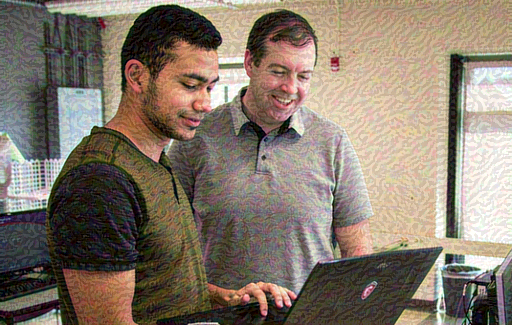

In [ ]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

Since it's working, perform a longer optimization:

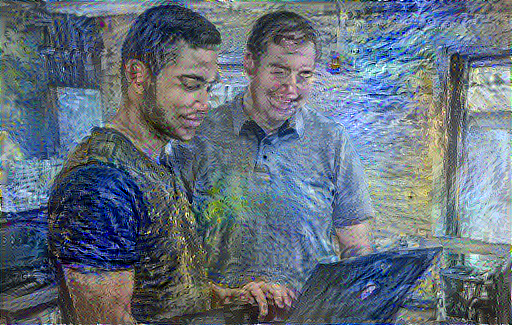

Train step: 1000
Total time: 55.1


In [ ]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))
  
end = time.time()
print("Total time: {:.1f}".format(end-start))

#Trying with more 300 steps per epoch but with 10 epochs

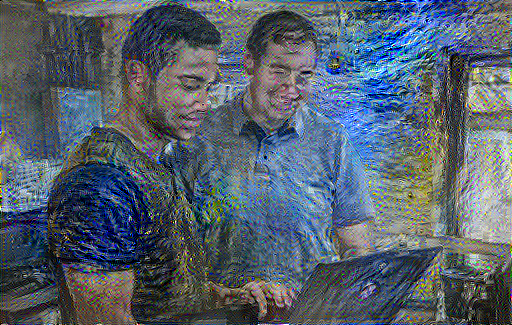

Train step: 3000
Total time: 175.6


In [ ]:
import time
start = time.time()
epochs = 10
steps_per_epoch = 300
step = 0
for n in range(epochs):
 for m in range(steps_per_epoch):
   step += 1
   train_step(image)
   print(".", end='')
 display.clear_output(wait=True)
 display.display(tensor_to_image(image))
 print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

#Trying with 5 epochs and 50 steps per epoch

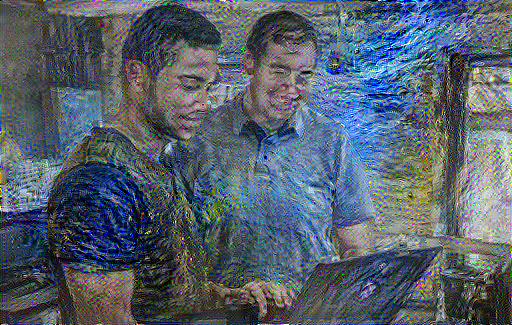

Train step: 250
Total time: 15.0


In [ ]:
import time
start = time.time()
epochs = 5
steps_per_epoch = 50
step = 0
for n in range(epochs):
 for m in range(steps_per_epoch):
  step += 1
  train_step(image)
  print(".", end='')
 display.clear_output(wait=True)
 display.display(tensor_to_image(image))
 print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

## Total variation loss

One downside to this basic implementation is that it produces a lot of high frequency artifacts. Decrease these using an explicit regularization term on the high frequency components of the image. In style transfer, this is often called the *total variation loss*:

In [ ]:
def high_pass_x_y(image):
  x_var = image[:, :, 1:, :] - image[:, :, :-1, :]
  y_var = image[:, 1:, :, :] - image[:, :-1, :, :]

  return x_var, y_var

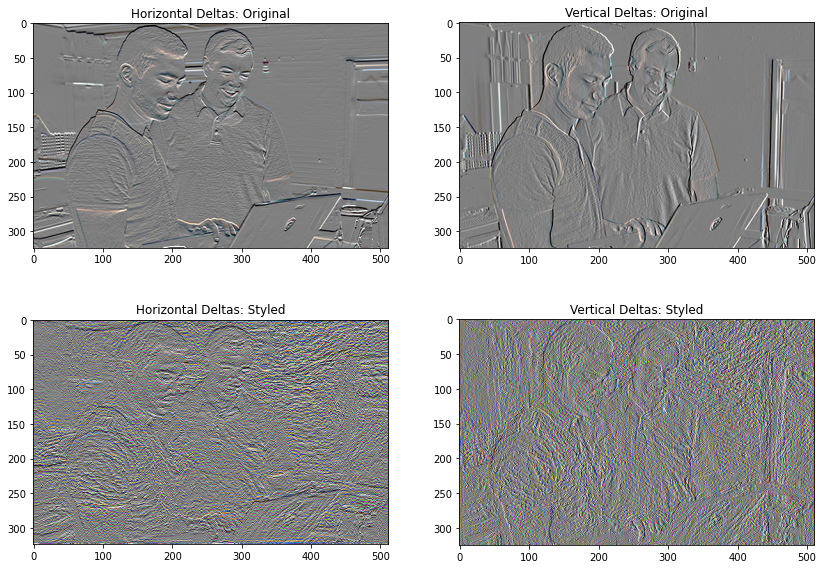

In [ ]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2, 2, 2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2, 2, 3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2, 2, 4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")

This shows how the high frequency components have increased.

Also, this high frequency component is basically an edge-detector. You can get similar output from the Sobel edge detector, for example:

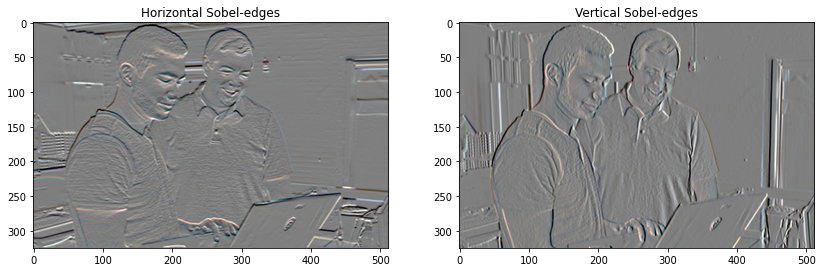

In [ ]:
plt.figure(figsize=(14, 10))

sobel = tf.image.sobel_edges(content_image)
plt.subplot(1, 2, 1)
imshow(clip_0_1(sobel[..., 0]/4+0.5), "Horizontal Sobel-edges")
plt.subplot(1, 2, 2)
imshow(clip_0_1(sobel[..., 1]/4+0.5), "Vertical Sobel-edges")

The regularization loss associated with this is the sum of the squares of the values:

In [ ]:
def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

In [ ]:
total_variation_loss(image).numpy()

126593.67

That demonstrated what it does. But there's no need to implement it yourself, TensorFlow includes a standard implementation:

In [ ]:
tf.image.total_variation(image).numpy()

array([126593.67], dtype=float32)

## Re-run the optimization

Choose a weight for the `total_variation_loss`:

In [ ]:
total_variation_weight=30

Now include it in the `train_step` function:

In [ ]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

Reinitialize the optimization variable:

In [ ]:
image = tf.Variable(content_image)

And run the optimization:

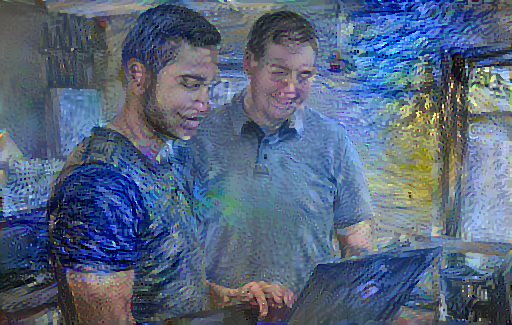

Train step: 1000
Total time: 56.9


In [ ]:
import time
start = time.time()


epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

#Using a higher variation rate

In [ ]:
total_variation_weight1=100

In [ ]:
@tf.function()
def train_step1(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight1*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

In [ ]:
image5 = tf.Variable(content_image)

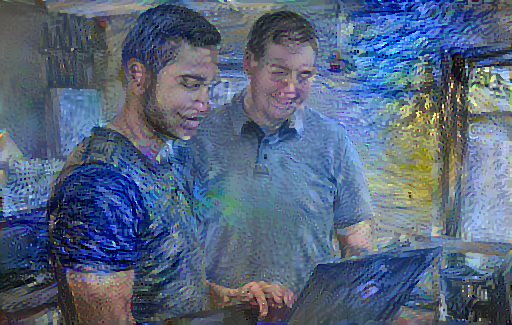

Train step: 1000
Total time: 59.5


In [ ]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step1(image5)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

Finally, save the result:

In [ ]:
file_name = 'stylized-image.png'
tensor_to_image(image).save(file_name)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(file_name)

#Investigations and findings 
Content image: picture from mathcs.clarku.edu
Style image: starry night by Vincent Van Gogh 

When we used the content image for style and content, the image got distorted and there were different part of image the content image that we in the background. For example we could see random faces, ears and monkey in the image.  

When we used the style image for style and content, the details of the image were blurred and replaced with the style parts of the image.

When we interchanged the style and content image, most of the background in the image got replace with facial structures.

We used a very realistic image with van gogh's painting, The main subjects of the realistic image were intact--with some color changes and the background changed to starry night background. 

We  we also did an experiment by increasing the steps per epoch but with the same number of epochs. We changes the  steps to 300 instead of a 100. The time taken was significantly higher with 175s, which makes sense, because greater number of epochs are greater time taken. In terms of the image, it is more aesthetically pleasing in a technical point of the images can be noticed.
The saturation of our image also inscreaed. 

We conducted a similar experiment as above but by decreasing the steps to 50 and the epocs as 5. The image came out to be pretty much the same but the time taken was lower. 

In the rerun the optimatzion stage we tryed experimenting with a higher varition rate( set to 100). The image came out to be the same but the time taken was slightly higher than before( 59.5s to 56.9s compared to before). 



We didn't quite understand VGG19. We found an explanation at https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c. VGG stands for Visual Geometry Group. It is a trained Convolution number of layers with trainable weights. 16 Convolutional layers and 3 Fully Connected layers.

We wanted to learn more about Einsum. We found a thorough and well explained post on StackOverflow  https://stackover ow.com/questions/26089893/understanding-numpys-einsum. Einsum can often outperform familiar array functions in terms of speed and memory efficiency because of expressive power and smart loops. It can multiply, sum and transpose arrays.

We didn't understand "frequency in images". It can be understood as the rate of change. Parts of the image that change rapidly from one color to another. We think that the frequency gets the boundary or outline of objects in the image.

We didn't understand the point of intermediate layers for style and content. This is done so that the network understands the image. It takes the raw image representation that converts the raw image pixels into a complex understanding of the feature.

We looked more into GradientTape. We read the following link: https://stackoverflow.com/questions/53953099/what-is-the-purpose-of-the-tensorflow-gradient-tape. GradientTape is a mathematical tool for automatic differentiation (autodiff), which is the core functionality of TensorFlow. It does not "track" the autodiff, it is a key part of performing the autodiff.

